# Meaning of column headings
1. <font color='red'><strong>Age</strong></font> is the age of candidate.
1. <font color='red'><strong>Sex</strong></font> has numeric values. 1 denotes male and 0 denotes female.
1. <font color='red'><strong>Chest Pain</strong></font> pain has values between 0-3. The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack.
1. <font color='red'><strong>Resting blood pressure</strong></font> is normal pressure with no exercise.
1. <font color='red'><strong>Cholesterol</strong></font> means the blockage for blood supply in the blood vessels.
1. <font color='red'><strong>Fasting Blood Pressure</strong></font> is blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.
1. <font color='red'><strong>Rest ECG</strong></font> results means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening.
1. The <font color='red'><strong>Maximum Heart Rate</strong></font> achieved.
1. <font color='red'><strong>Exercise induced angina</strong></font> is chest pain while exercising or doing any physical activity.
1. <font color='red'><strong>ST Depression</strong></font> is the difference between value of ECG at rest and after exercise.
1. <font color='red'><strong>ST Slope</strong></font> is the tangent to the depression value.
1. The <font color='red'><strong>number of major blood vessels</strong></font> supplying blood to heart blocked.
1. The <font color='red'><strong>Types of thalassemia</strong></font>. 
1. <font color='red'><strong>Heart attack prediction</strong></font> where 1 denotes Heart attack occured and 0 where it din't take occur.

In [3]:
#Loading The Libraries

#For uploading and accessing the data
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("../input/heart-disease-uci/heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'}, inplace = True)

Renaming the column headers for better understanding of visualizations.

In [8]:
df2 = df.copy()
df1 = df.copy()
df.head()
#1 = Male and 0 = Female in 'Sex' column.

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_attack               0
dtype: int64

No empty values in the dataset.

In [10]:
df1['Sex'].replace({1:'Male',0:'Female'},inplace = True)
df1['Heart_attack'].replace({1:'Heart_attack - Yes',0:'Heart_attack - No'},inplace = True)

Replacing the values for Sex and Heart_Attack colummns as these will make the understanding of visualizations better instead of numeric values.

# Analysis of data by GroupBy and Cmap

In [11]:
s= df1.groupby(['Sex','Age'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(20).style.background_gradient(cmap='Purples')

,Sex,Age,Heart_attack
59,Male,58,13
58,Male,57,13
60,Male,59,13
53,Male,52,12
55,Male,54,11
45,Male,44,9
52,Male,51,8
57,Male,56,8
61,Male,60,7
65,Male,64,7


This shows the total number of heart attacks that have occured for a particular age in case of males and females. In the top 20 count of heart attack, males have witnessed more heart attacks for their ages.

In [12]:
s= df1.groupby(['Sex','Chest_pain'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,Sex,Chest_pain,Heart_attack
4,Male,0,104
6,Male,2,52
0,Female,0,39
2,Female,2,35
5,Male,1,32
7,Male,3,19
1,Female,1,18
3,Female,3,4


The Males having chest pain type 0 suffered the most heart attacks and type 2 the second highest. This trend is same for females.

In [13]:
s= df1.groupby(['Sex','Resting_blood_pressure'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,Sex,Resting_blood_pressure,Heart_attack
46,Male,120,27
54,Male,130,24
60,Male,140,22
40,Male,110,16
15,Female,130,12
50,Male,125,11
21,Female,140,10
66,Male,150,10
10,Female,120,10
52,Male,128,9


The resting blood pressure and the cases of heart attack for such pressure in case of males and females.

In [14]:
s= df1.groupby(['Sex','Cholesterol'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Cholesterol,Heart_attack
115,Male,212,5
109,Male,204,4
135,Male,234,4
134,Male,233,4
172,Male,282,4
150,Male,254,4
48,Female,269,4
144,Male,246,3
143,Male,245,3
141,Male,243,3


Generally males having high cholesterol had higher cases of heart attacks than females at the same Cholesterol.

In [15]:
s= df1.groupby(['Sex','Fasting_blood_sugar'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Fasting_blood_sugar,Heart_attack
2,Male,0,174
0,Female,0,84
3,Male,1,33
1,Female,1,12


This shows relation of Fasting blood sugar with heart attack in case of Male and Females.

In [16]:
s= df1.groupby(['Sex','ECG_results'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,Sex,ECG_results,Heart_attack
3,Male,0,103
4,Male,1,103
1,Female,1,49
0,Female,0,44
2,Female,2,3
5,Male,2,1


This shows the lower the ECG Results, the more cases of heart attack occurred.

In [17]:
s= df1.groupby(['Sex','Maximum_heart_rate'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Oranges')

,Sex,Maximum_heart_rate,Heart_attack
86,Male,144,7
77,Male,132,7
103,Male,162,7
113,Male,173,7
82,Male,140,6
42,Female,172,6
91,Male,150,6
70,Male,125,6
97,Male,156,6
34,Female,163,5


The maximum heart rate varied for heart attack and were higher for males resulting in heart attack

In [18]:
s= df1.groupby(['Sex','Exercise_induced_angina'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,Sex,Exercise_induced_angina,Heart_attack
2,Male,0,130
3,Male,1,77
0,Female,0,74
1,Female,1,22


Exercise induced chest pain was higher in males and more resulted in Heart attacks.

In [19]:
s= df1.groupby(['Sex','ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,Sex,ST_depression,Heart_attack
27,Male,0.000000,64
0,Female,0.000000,35
37,Male,1.200000,13
34,Male,0.800000,10
36,Male,1.000000,9
41,Male,1.800000,8
38,Male,1.400000,8
33,Male,0.600000,8
43,Male,2.000000,7
40,Male,1.600000,7


The lower the depression, the higher the cases were for heart attack.

In [20]:
s= df1.groupby(['Sex','ST_slope'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,Sex,ST_slope,Heart_attack
5,Male,2,96
4,Male,1,95
2,Female,2,46
1,Female,1,45
3,Male,0,16
0,Female,0,5


The higher the slope value, the higher were the cases for Heart attack.

In [21]:
s= df1.groupby(['Sex','Major_vessels'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Major_vessels,Heart_attack
4,Male,0,111
0,Female,0,64
5,Male,1,50
6,Male,2,25
7,Male,3,16
1,Female,1,15
2,Female,2,13
8,Male,4,5
3,Female,3,4


The lower the number of vessels blocked, the higher were the heart attack cases. This means that 0 represents that all 4 major blood vessels were blocked and 4 represented all vessels were free for flow.

In [22]:
s= df1.groupby(['Sex','Thalassemia_types'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,Sex,Thalassemia_types,Heart_attack
7,Male,3,102
6,Male,2,87
2,Female,2,79
5,Male,1,17
3,Female,3,15
0,Female,0,1
1,Female,1,1
4,Male,0,1


The higher the Thalassemia type, the higher were the cases of heart attack.

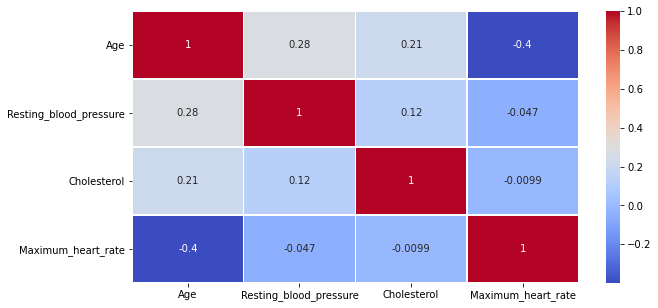

In [23]:
df2.drop(['Sex','Fasting_blood_sugar','Heart_attack','Chest_pain','ECG_results','Exercise_induced_angina','ST_slope','ST_depression','Major_vessels','Thalassemia_types'],axis = 'columns',inplace = True)
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True, linewidth=0.5, cmap='coolwarm')

# Univariate Data Analysis

I have dropped categorical variables for heart attack heatmap and only continuous variables are shown.

1. This shows age has some dependency on Resting Blood Pressure and Cholesterol. There is almost no dependecy of Maximum heart rate on Age.
1. Resting blood pressure and Cholesterol also has a low dependency. Maximum heart rate and Resting blood pressure has almost no dependency.

<h1><font color='turquoise'><strong></strong></font></h1>

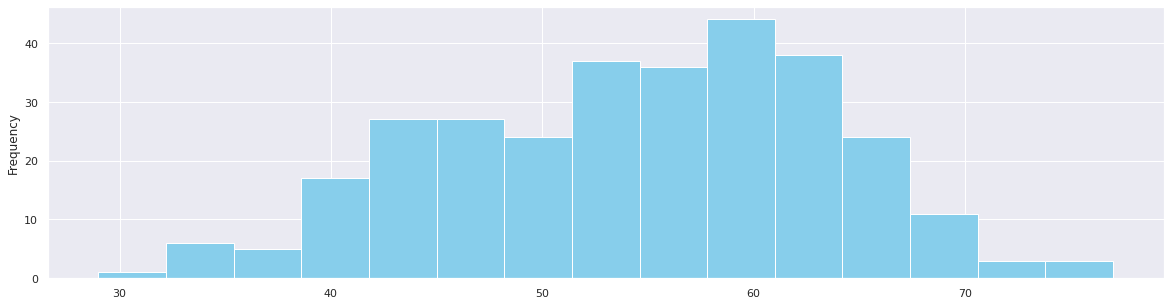

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
df['Age'].plot.hist(bins = 15, color = 'skyblue')

The span of Ages that were taken for the case study.

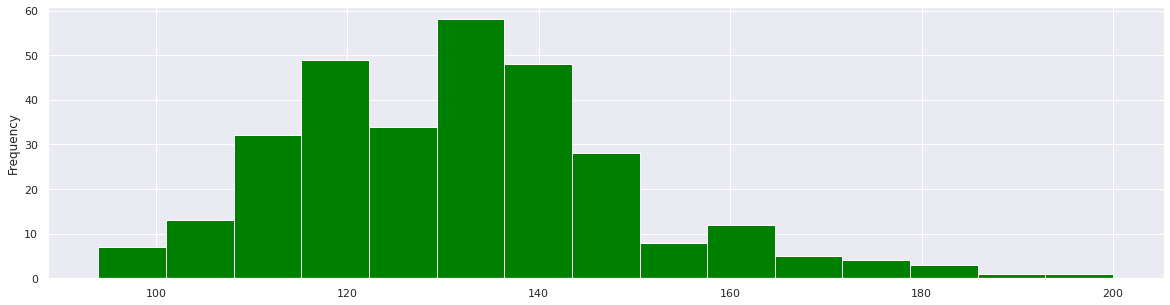

In [25]:
df['Resting_blood_pressure'].plot.hist(bins = 15, color = 'green')

The span of Resting Blood pressure in the case study and they have an average value of 120-140.

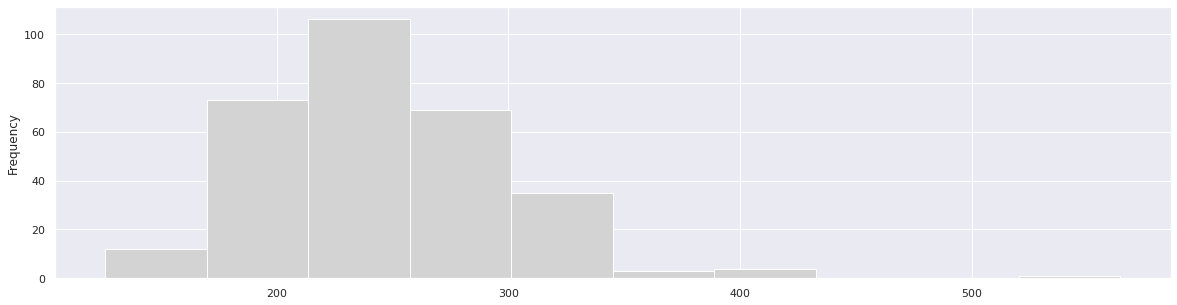

In [26]:
df['Cholesterol'].plot.hist(bins = 10, color = 'lightgrey')

The cholesterol lies between 200 and 300.

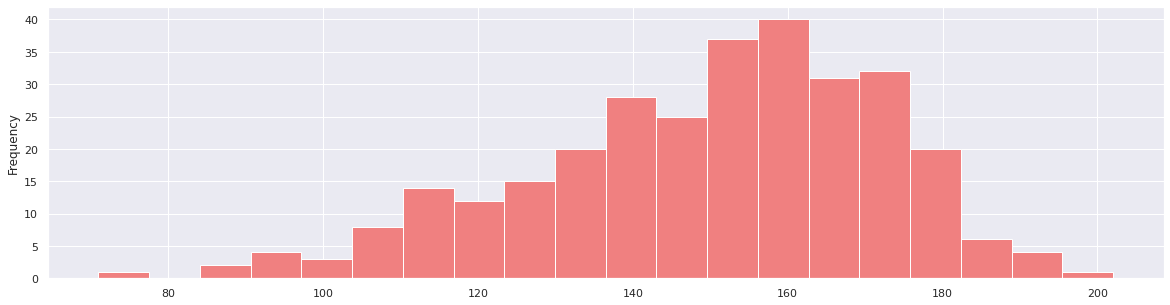

In [27]:
df['Maximum_heart_rate'].plot.hist(bins = 20, color = 'lightcoral')

The maximum heart rate recorded for the patients. The span is showed and it had the maximum average at 160.

# Bivariate Data Analysis

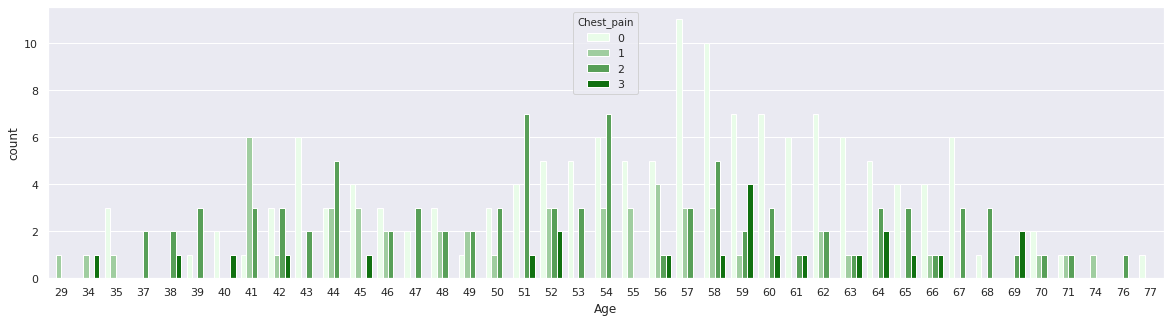

In [28]:
sns.countplot(x = 'Age',hue = 'Chest_pain', data = df, color = 'green')

The dependence of Chest pain on Age.

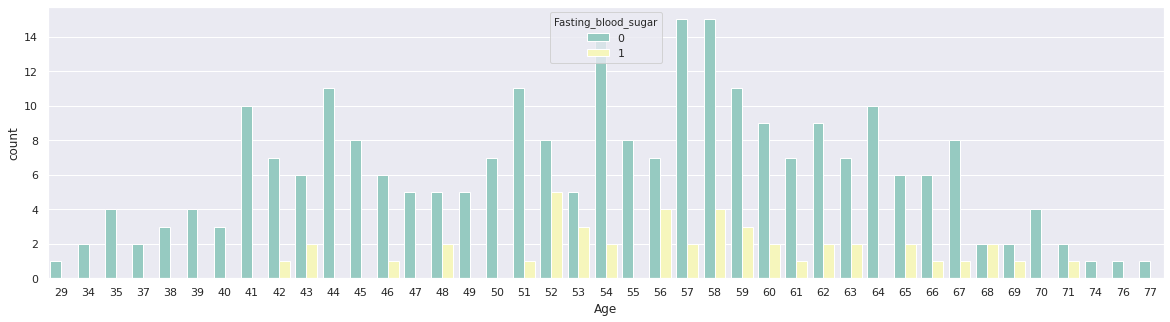

In [29]:
sns.countplot(x = 'Age',hue = 'Fasting_blood_sugar', data = df,palette="Set3")

The dependence of result of Fasting blood sugar on age.

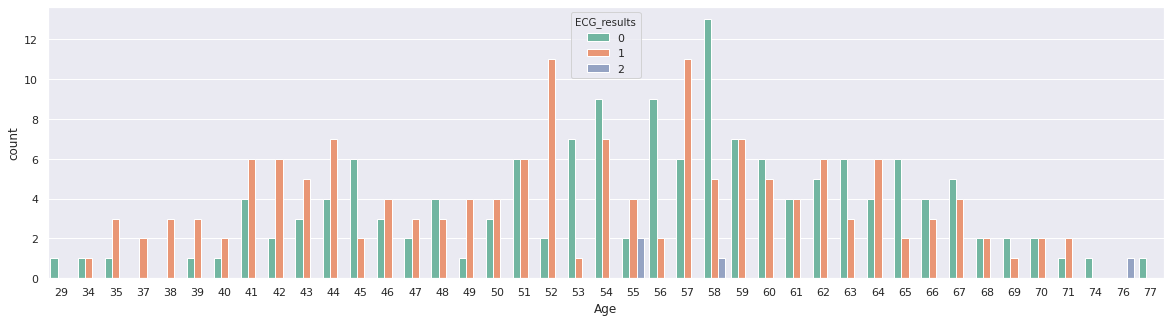

In [30]:
sns.countplot(x = 'Age',hue = 'ECG_results', data = df,palette="Set2")

The dependence of result of ECG on age.

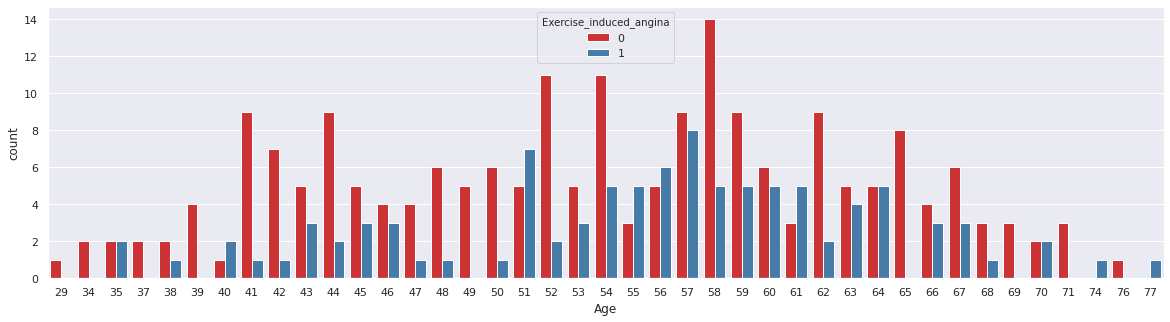

In [31]:
sns.countplot(x = 'Age',hue = 'Exercise_induced_angina', data = df,palette="Set1")

The dependence of result of Exercise Induced Angina on age.

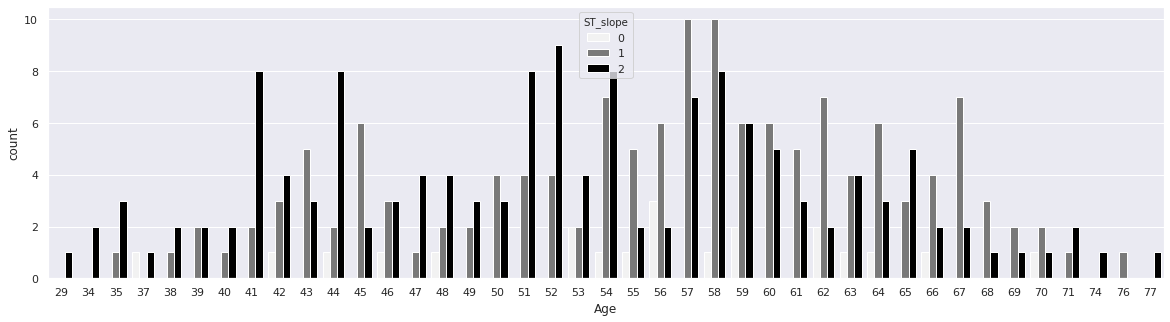

In [32]:
sns.countplot(x = 'Age',hue = 'ST_slope', data = df, color = "black")

The dependence of result of ST Slope on age.

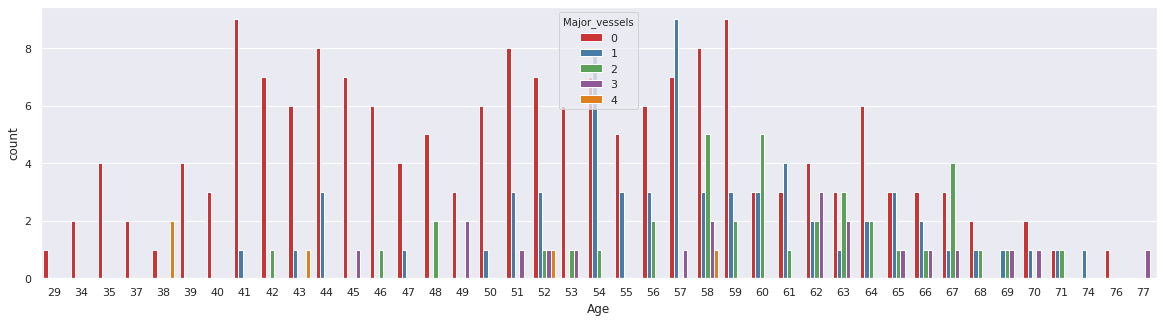

In [33]:
sns.countplot(x = 'Age',hue = 'Major_vessels', data = df, palette='Set1')

The dependence of result of Major vessels being blocked with age.

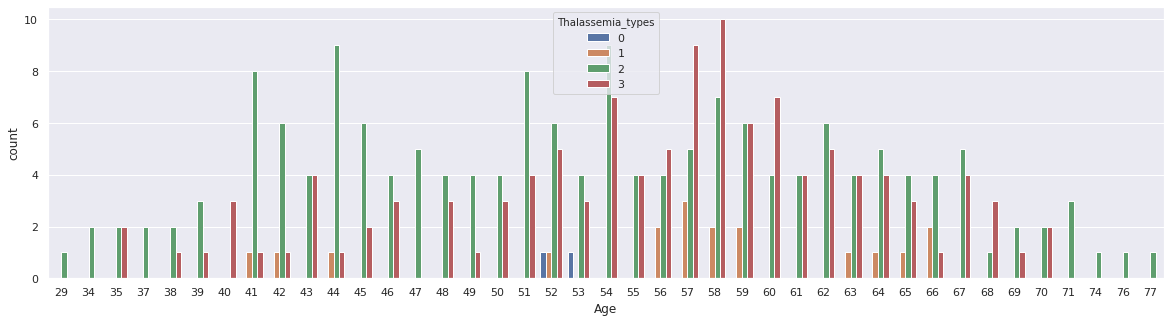

In [34]:
sns.countplot(x = 'Age',hue = 'Thalassemia_types', data = df)

The dependence of result of Thalassemia on age.

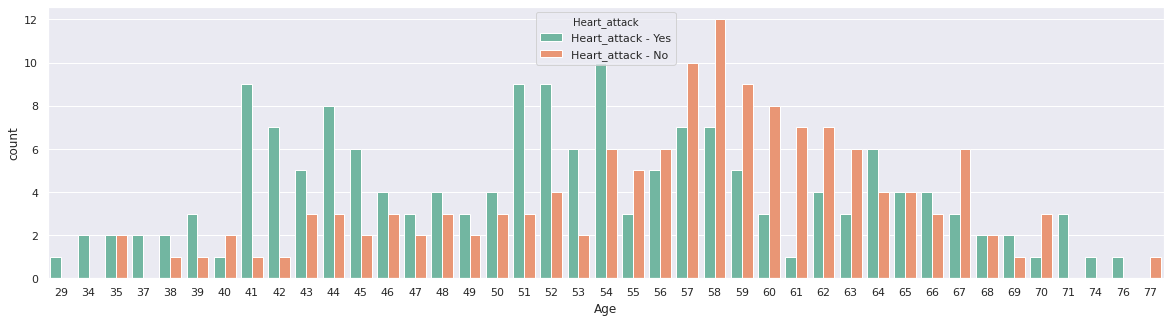

In [35]:
sns.countplot(x = 'Age',hue = 'Heart_attack', data = df1, palette = 'Set2')

The dependence of Heart Attack on Age.

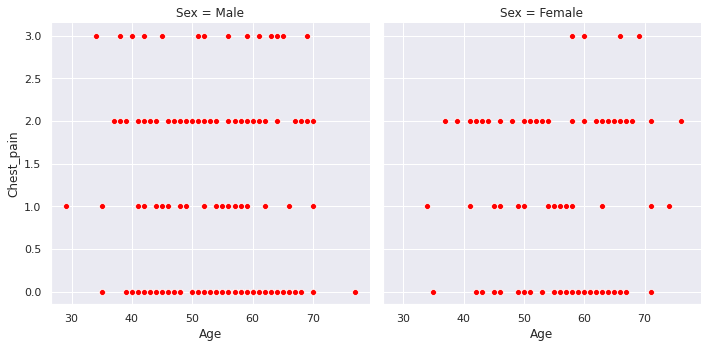

In [36]:
sns.relplot(x ='Age', y ='Chest_pain', col = 'Sex', data = df1, color = 'red', height = 5)

Relationship between Chest Pain, Age and Sex.

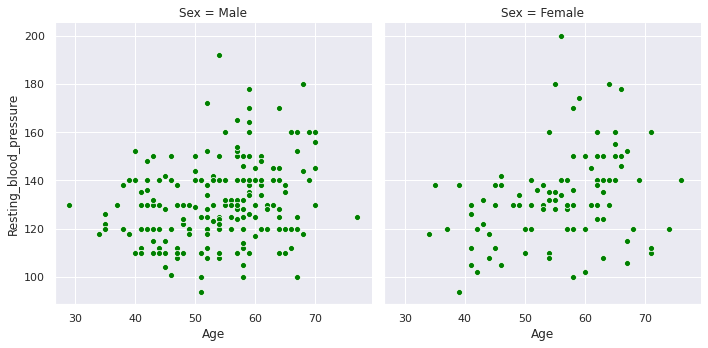

In [37]:
sns.relplot(x ='Age', y ='Resting_blood_pressure', col = 'Sex', data = df1, color = 'green')

Relationship between Rising Blood Pressure, Age and Sex.

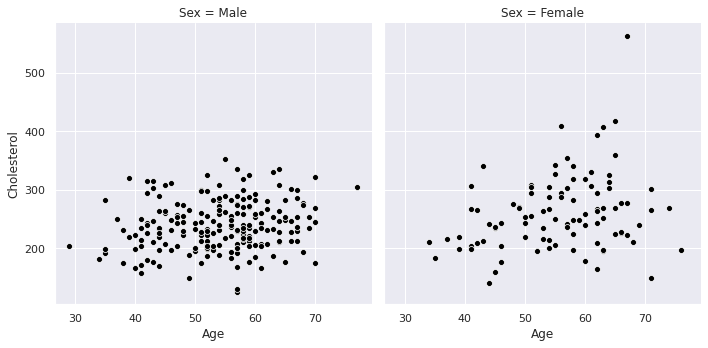

In [38]:
sns.relplot(x ='Age', y ='Cholesterol', col = 'Sex', data = df1, color = 'black')

Relationship between Cholesterol, Age and Sex.

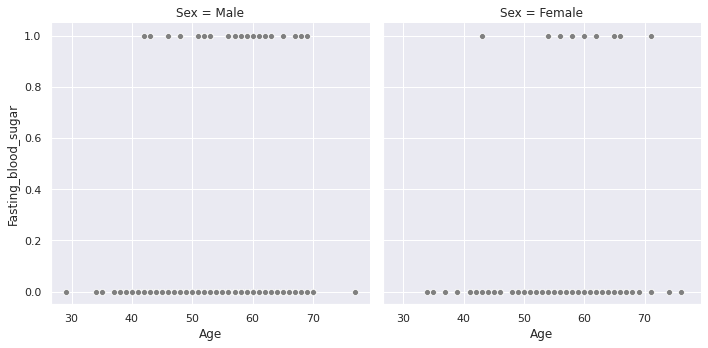

In [39]:
sns.relplot(x ='Age', y ='Fasting_blood_sugar', col = 'Sex', data = df1, color = 'grey')

Relationship between Fasting Blood Sugar, Age and Sex.

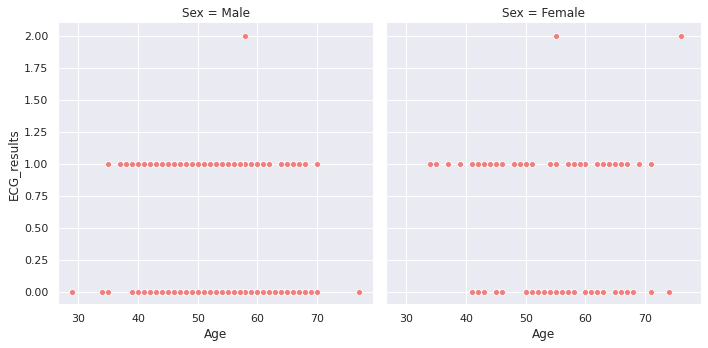

In [40]:
sns.relplot(x ='Age', y ='ECG_results', col = 'Sex', data = df1, color = 'lightcoral')

Relationship between ECG Results, Age and Sex.

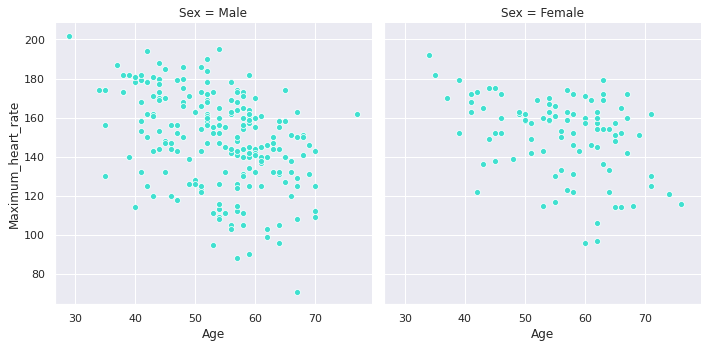

In [41]:
sns.relplot(x ='Age', y ='Maximum_heart_rate', col = 'Sex', data = df1, color = 'turquoise')

Relationship between Maximum Heart Rate, Age and Sex.

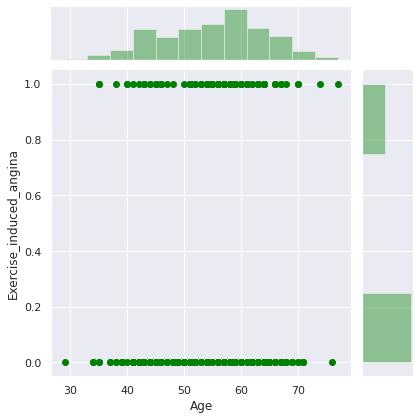

In [42]:
sns.jointplot(x =df['Age'], y =df1['Exercise_induced_angina'], data = df1, color = 'green')

Relationship between Exercise Induced Angina and Age. The Age peaks at about 60 and Exercise Induced Angina problem is more at value 0.

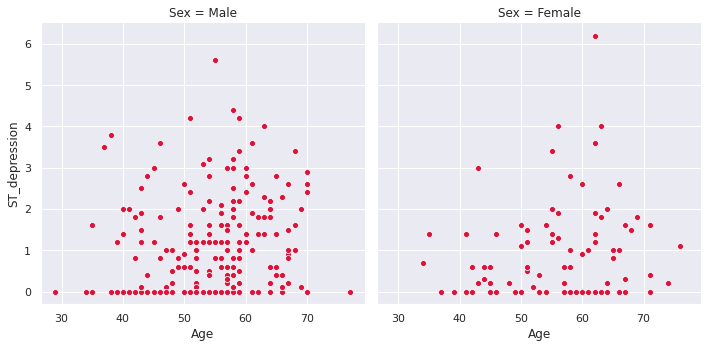

In [43]:
sns.relplot(x ='Age', y ='ST_depression', col = 'Sex', data = df1, color = 'crimson')

Relationship between ST_depression, Age and Sex.

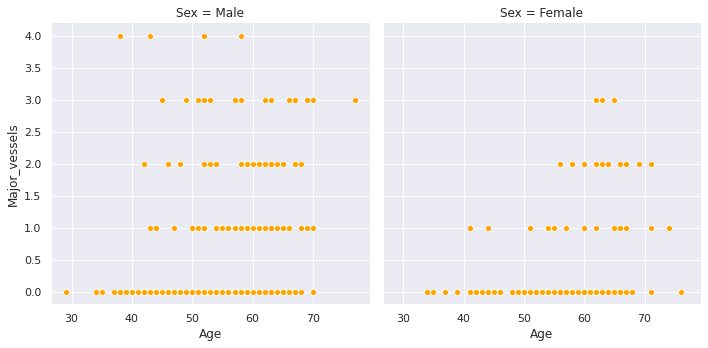

In [44]:
sns.relplot(x ='Age', y ='Major_vessels', col = 'Sex', data = df1, color = 'orange')

Relationship between Major_vessels, Age and Sex.

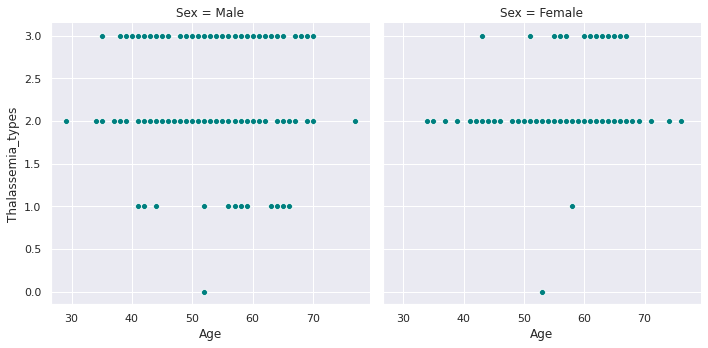

In [45]:
sns.relplot(x ='Age', y ='Thalassemia_types', col = 'Sex', data = df1, color = 'teal')

Relationship between Thalassemia type, Age and Sex.

![Explanation of Box Plot](https://www.simplypsychology.org/boxplot.jpg)

Max means the maximum value of records for the boxplot.

Upper Quartile encompasses the 75% of the population in the box plot.

Lower Quartile encompasses the 25% of the population in the box plot.

Inter Quartile encompasses the 25-75% of the population in the box plot. 


Median represents the middle value of the population of the category.

Min represents the minimum value from where records start for boxplot.

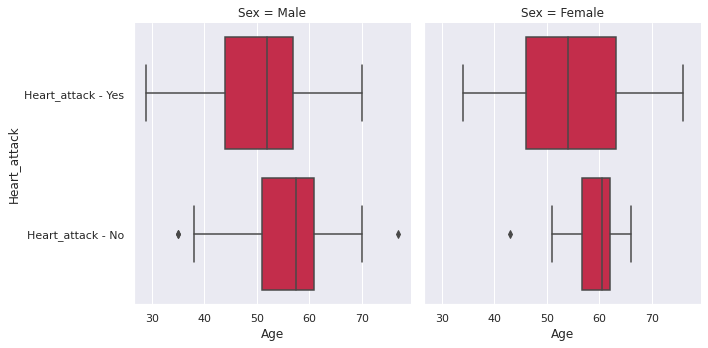

In [46]:
sns.catplot(x ='Age', y ='Heart_attack', col = 'Sex', data = df1, color = 'crimson', kind = 'box')

Relationship between Heart Attack, Age and Sex.

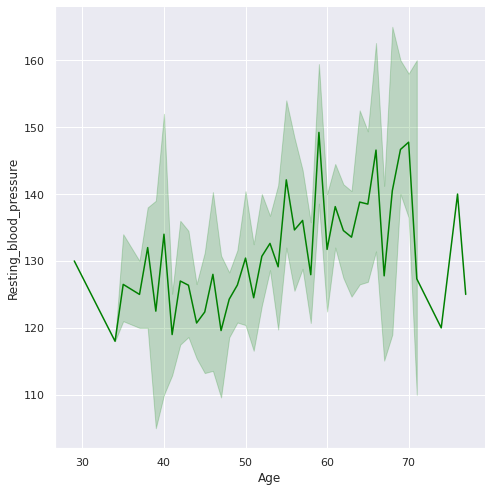

In [47]:
sns.relplot(x = 'Age', y = 'Resting_blood_pressure', kind = 'line', data=df,aspect = 1,height = 7, color = 'green')

The shaded lines above and below the dark green lines specifies that multiple values are present on that instance. They all have regarded and their mean is taken for plotting.

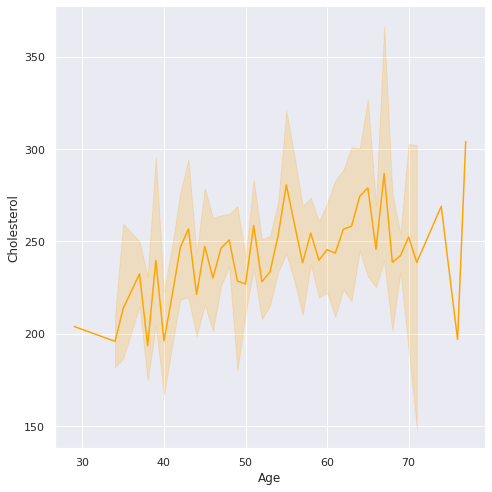

In [48]:
sns.relplot(x = 'Age', y = 'Cholesterol', kind = 'line', data=df,aspect = 1,height = 7, color = 'orange')

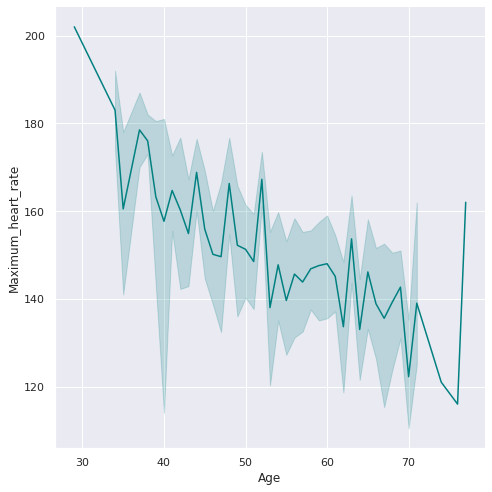

In [49]:
sns.relplot(x = 'Age', y = 'Maximum_heart_rate', kind = 'line', data=df,aspect = 1,height = 7, color = 'teal')

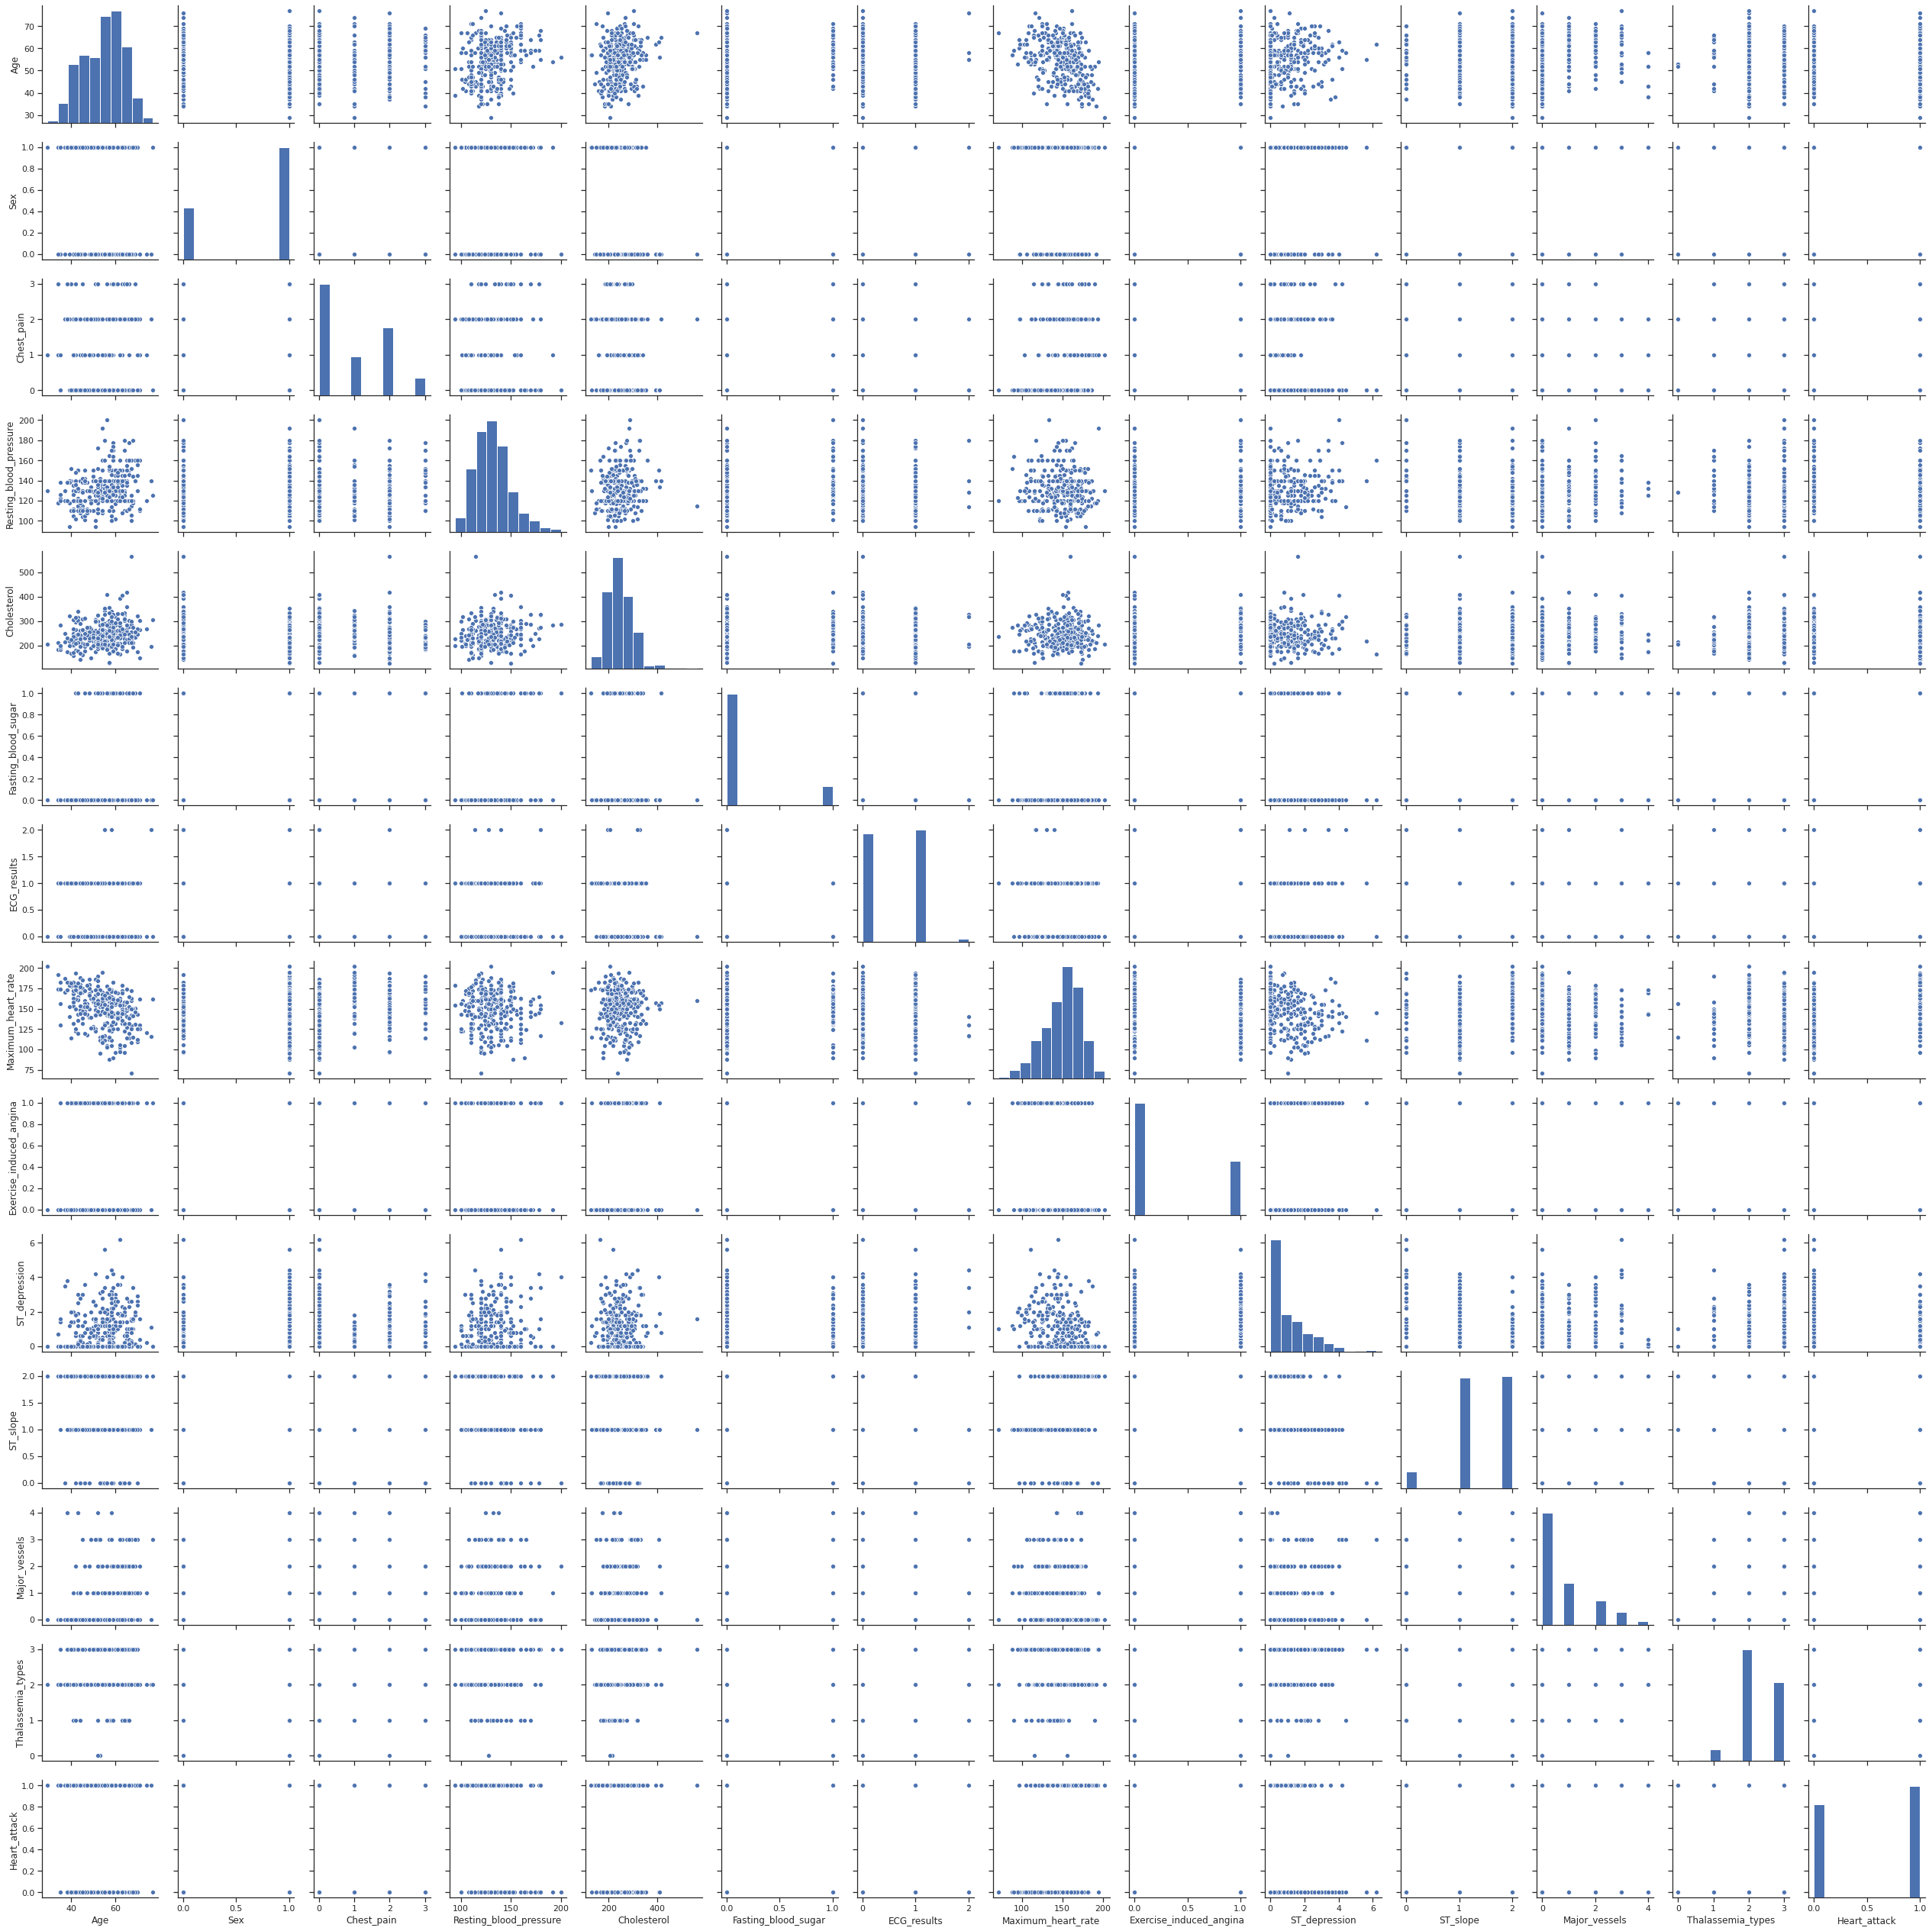

In [50]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)

This shows overall relationship between all the columns in the DataFrame.

<h2><font color='green'>The overall graphical analysis shows that females tend to suffer less from heart attack and that men have a higher chances of getting struck by a heart attack.<br>
Men don't have a defined age span that they are safe from heart attack. Men below 30 also suffered from heart attack which wasn't the case with women. This shows men have to be more careful with their health conditions and situations.
</font></h2>

<h4><font color='orange'>Age was not such a huge critera for suffering from heart attack and rest of the parameters had very little relation amongst themselves. The tests taken showed various results where the patterns showed that the heart attack conditions could have been diagonsed a bit earlier.<br>
If you go for some tests and the results are not good, then better proceedings need to be taken to avoid heart attack. Otherwise, there is no avoiding a heart attack.
    </font></h4>

# Model Selection and Training

In [51]:
#Libraries for model selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#Libraries for various model parameter selection.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.metrics import accuracy_score,confusion_matrix
import scikitplot as skplt
from sklearn import metrics

In [52]:
dummy1 = pd.get_dummies(df.Chest_pain)
dummy2 = pd.get_dummies(df.Thalassemia_types)
dummy3 = pd.get_dummies(df.ECG_results)
dummy4 = pd.get_dummies(df.ST_slope)
dummy5 = pd.get_dummies(df.Major_vessels)
merge = pd.concat([df,dummy1,dummy2,dummy3,dummy4,dummy5],axis = 'columns')

I have created dummy variables for categorical data to increase the accuracy.

In [53]:
final = merge.drop(['Chest_pain','Thalassemia_types','ECG_results','ST_slope','Major_vessels'],axis = 1)
final.head()

,Age,Sex,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,Maximum_heart_rate,Exercise_induced_angina,ST_depression,Heart_attack,0,...,1,2,0,1,2,0,1,2,3,4
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,0,0,0,1,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,0,0,1,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,0,0,0,1,1,0,0,0,0


In [54]:
x = final.drop(['Heart_attack'], axis = 1)
y = final['Heart_attack']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 5)

In [56]:
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

Scaled the data for better result.

In [57]:
accuracy = []

List which will store the accuracy value for all models used.

# Logistic Regression

In [58]:
C = [0.01,0.1, 1, 5, 10]

Log = LogisticRegression()

parameters = {'C': [.1 ,2, 5, 10, 15, 20]}

log_regressor = GridSearchCV(Log, parameters, scoring='neg_mean_squared_error' ,cv =5)
log_regressor.fit(x_train, y_train)
log_regressor.best_params_

{'C': 0.1}

In [59]:
model1 = LogisticRegression(C=0.1)
model1.fit(x_train,y_train)
accuracy1 = model1.score(x_test,y_test)
accuracy.append(accuracy1)
print('Logistic Regression Accuracy -->',((accuracy1)*100))

Logistic Regression Accuracy --> 88.52459016393442


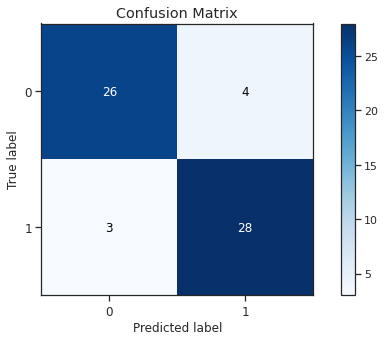

In [60]:
pred1 = model1.predict(x_test)
matrix1 = (y_test,pred1)
skplt.metrics.plot_confusion_matrix(y_test, pred1,figsize=(10,5))

This shows there were problem in only 7 values, otherwise all the values were predicted right.

# Decision Trees

In [61]:
criterion = ['gini','entropy']
splitter = ['best','random']

Tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini','entropy']}

tree_classifier = GridSearchCV(Tree, parameters, scoring='neg_mean_squared_error' ,cv =5)
tree_classifier.fit(x_train, y_train)
tree_classifier.best_params_

{'criterion': 'gini'}

In [62]:
model2 = DecisionTreeClassifier(criterion = 'gini')
model2.fit(x_train,y_train)
accuracy2 = model2.score(x_test,y_test)
accuracy.append(accuracy2)
print('Decision Tree Accuracy -->',((accuracy2)*100))

Decision Tree Accuracy --> 81.9672131147541


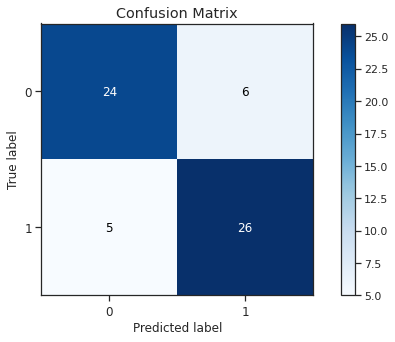

In [63]:
pred2 = model2.predict(x_test)
matrix2 = (y_test,pred2)
skplt.metrics.plot_confusion_matrix(y_test ,pred2 ,figsize=(10,5))

This shows there were problem in 10 values, otherwise all the values were predicted right.

# Support Vector Machine

In [64]:
penalty = ['l1','l2']
C = [0.01,0.1,1,5,10,15,20]
loss = ['hinge','squared_hinge']

SVM = LinearSVC()

parameters = {'penalty':['l1','l2'],'C': [.01,.1,1,5,10,15,20],'loss':['hinge','squared_hinge']}

SVM_classifier = GridSearchCV(SVM, parameters, scoring='neg_mean_squared_error' ,cv =5)
SVM_classifier.fit(x_train, y_train)
SVM_classifier.best_params_

{'C': 0.01, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [65]:
model3 = LinearSVC(C = 15,loss = 'hinge',penalty = 'l2')
model3.fit(x_train,y_train)
accuracy3 = model3.score(x_test,y_test)
accuracy.append(accuracy3)
print('SVM Classifier Accuracy -->',((accuracy3)*100))

SVM Classifier Accuracy --> 85.24590163934425


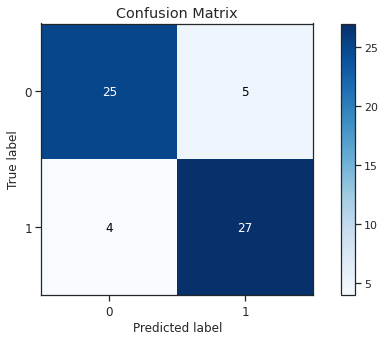

In [66]:
pred3 = model3.predict(x_test)
matrix3 = (y_test,pred3)
skplt.metrics.plot_confusion_matrix(y_test ,pred3 ,figsize=(10,5))

This shows there were problem in 9 values, otherwise all the values were predicted right.

# Gaussian Naive Bayes

In [67]:
model4 = GaussianNB()

model4.fit(x_train, y_train)
accuracy4 = model4.score(x_test,y_test)
accuracy.append(accuracy4)
print('Gaussian NB Accuracy -->',((accuracy4)*100))

Gaussian NB Accuracy --> 85.24590163934425


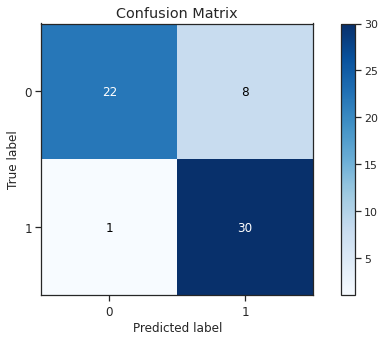

In [68]:
pred4 = model4.predict(x_test)
matrix4 = (y_test,pred4)
skplt.metrics.plot_confusion_matrix(y_test ,pred4 ,figsize=(10,5))

This shows there were problem in 9 values, otherwise all the values were predicted right.

# Multinomial Naive Bayes

In [69]:
model5 = MultinomialNB()

model5.fit(x_train, y_train)
accuracy5 = model5.score(x_test,y_test)
accuracy.append(accuracy5)
print('Multinomial NB Accuracy -->',((accuracy5)*100))

Multinomial NB Accuracy --> 88.52459016393442


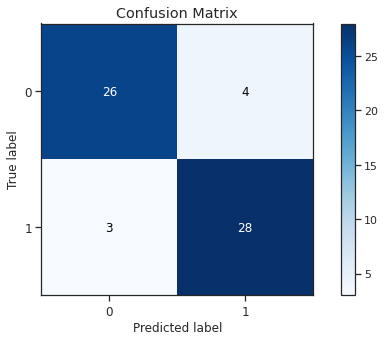

In [70]:
pred5 = model5.predict(x_test)
matrix5 = (y_test,pred5)
skplt.metrics.plot_confusion_matrix(y_test ,pred5 ,figsize=(10,5))

This shows there were problem in only 7 values, otherwise all the values were predicted right.

# Random Forest Classifier

In [71]:
n_estimators = [250,500,750,1000]
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']
random_state = [5]

RF = RandomForestClassifier()

parameters = {'n_estimators': [250,500,750,1000],'criterion': ['gini','entropy'],'max_features':['auto','sqrt','log2']}

RFClassifier = GridSearchCV(RF, parameters, scoring='neg_mean_squared_error' ,cv =5)
RFClassifier.fit(x_train, y_train)
RFClassifier.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 750}

In [72]:
model6 = RandomForestClassifier(criterion = 'entropy',max_features = 'log2',n_estimators = 250, random_state = 5)
model6.fit(x_train,y_train)
accuracy6 = model6.score(x_test,y_test)
accuracy.append(accuracy6)
print('Random Forest Classifier Accuracy -->',((accuracy6)*100))

Random Forest Classifier Accuracy --> 93.44262295081968


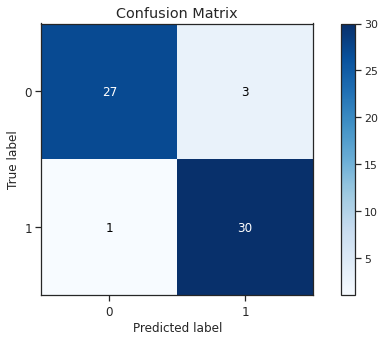

In [73]:
pred6 = model6.predict(x_test)
matrix6 = (y_test,pred6)
skplt.metrics.plot_confusion_matrix(y_test ,pred6 ,figsize=(10,5))

This shows there were problem in only 4 values, otherwise all the values were predicted right.

# Gradient Boosting Classifier


In [74]:
n_estimators = [250,500,750,1000]
loss = ['deviance','exponential']
max_features = ['auto','sqrt','log2']

GB = GradientBoostingClassifier()

parameters = {'n_estimators': [250,500,750,1000],'loss': ['deviance','exponential'],'max_features':['auto','sqrt','log2']}

GBClassifier = GridSearchCV(GB, parameters, scoring='neg_mean_squared_error' ,cv =5)
GBClassifier.fit(x_train, y_train)
GBClassifier.best_params_

{'loss': 'exponential', 'max_features': 'log2', 'n_estimators': 250}

In [75]:
model7 = GradientBoostingClassifier(loss = 'deviance',max_features = 'log2',n_estimators = 500, random_state = 5)
model7.fit(x_train,y_train)
accuracy7 = model7.score(x_test,y_test)
accuracy.append(accuracy7)
print('Gradient Boosting Classifier Accuracy -->',((accuracy7)*100))

Gradient Boosting Classifier Accuracy --> 85.24590163934425


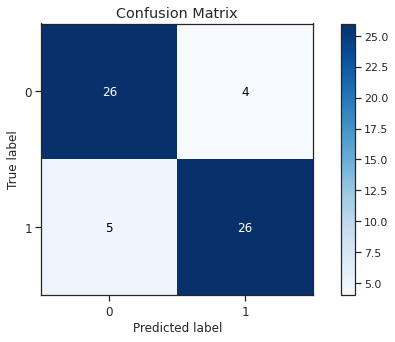

In [76]:
pred7 = model7.predict(x_test)
matrix7 = (y_test,pred7)
skplt.metrics.plot_confusion_matrix(y_test ,pred7 ,figsize=(10,5))

This shows there were problem in 9 values, otherwise all the values were predicted right.

# K-Nearest Neighbors

Text(0, 0.5, 'Accuracy')

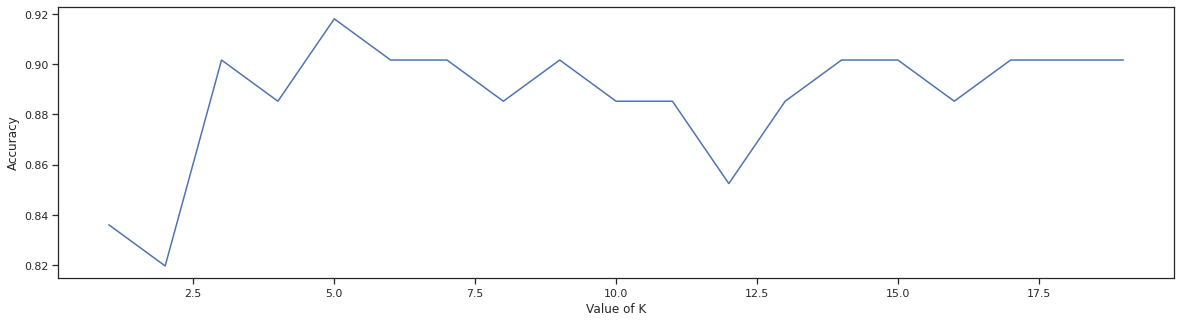

In [77]:
Krange = range(1,20)
scores = {}
scores_list = []
for k in Krange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
plt.plot(Krange,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [78]:
model8 = KNeighborsClassifier(n_neighbors = 5)
model8.fit(x_train,y_train)
accuracy8 = model8.score(x_test,y_test)
accuracy.append(accuracy8)
print('Gradient Boosting Classifier Accuracy -->',((accuracy8)*100))

Gradient Boosting Classifier Accuracy --> 91.80327868852459


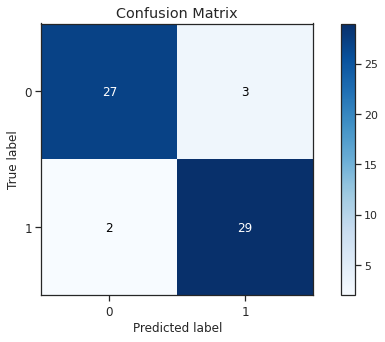

In [79]:
pred8 = model8.predict(x_test)
matrix8 = (y_test,pred8)
skplt.metrics.plot_confusion_matrix(y_test ,pred8 ,figsize=(10,5))

This shows there were problem in only 5 values, otherwise all the values were predicted right.

# Overall accuracies obtained by the models

In [80]:
Models = ['Logistic Regression','Decision Tree','SVM Classifier','Gaussian NB','Multinomial NB','Random Forest Classifier','Gradient Boost Classifier','K-Nearest Neighbors']
total = list(zip(Models,accuracy))
output = pd.DataFrame(total, columns = ['Models','Accuracy'])

In [81]:
s = output.groupby(['Models'])['Accuracy'].mean().reset_index().sort_values(by='Accuracy',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Models,Accuracy
6,Random Forest Classifier,0.934426
3,K-Nearest Neighbors,0.918033
4,Logistic Regression,0.885246
5,Multinomial NB,0.885246
1,Gaussian NB,0.852459
2,Gradient Boost Classifier,0.852459
7,SVM Classifier,0.852459
0,Decision Tree,0.819672


This shows the accuracy of all the models that were obtained in a descending format.

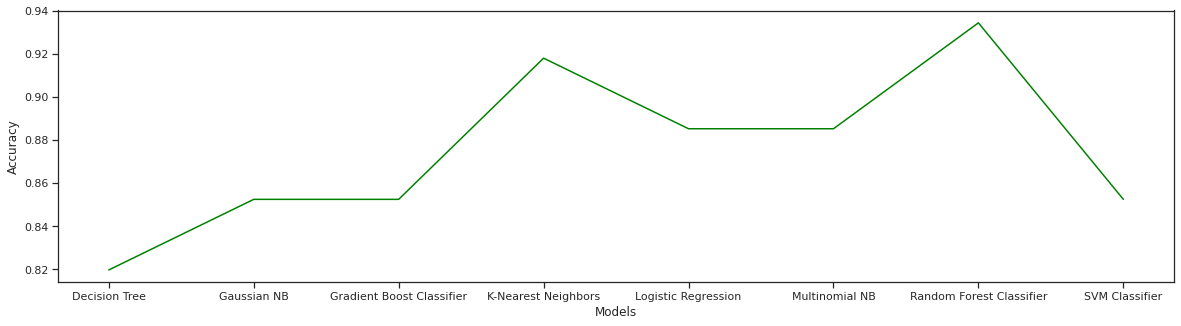

In [82]:
sns.lineplot(x = 'Models',y = 'Accuracy',data = output, color = 'Green' )

The lineplot of various models and their accuracy obtained.

<h3><font color ='green'>The Random Forest Classifier has the highest accuracy and it went up to 93% accuracy in several random_state cases.<br>
    The KNN Classifier showed the second higest accuracy and third came the Logisic Regression classifier.
</font></h3>